In [211]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
import warnings

In [212]:
warnings.filterwarnings("ignore")

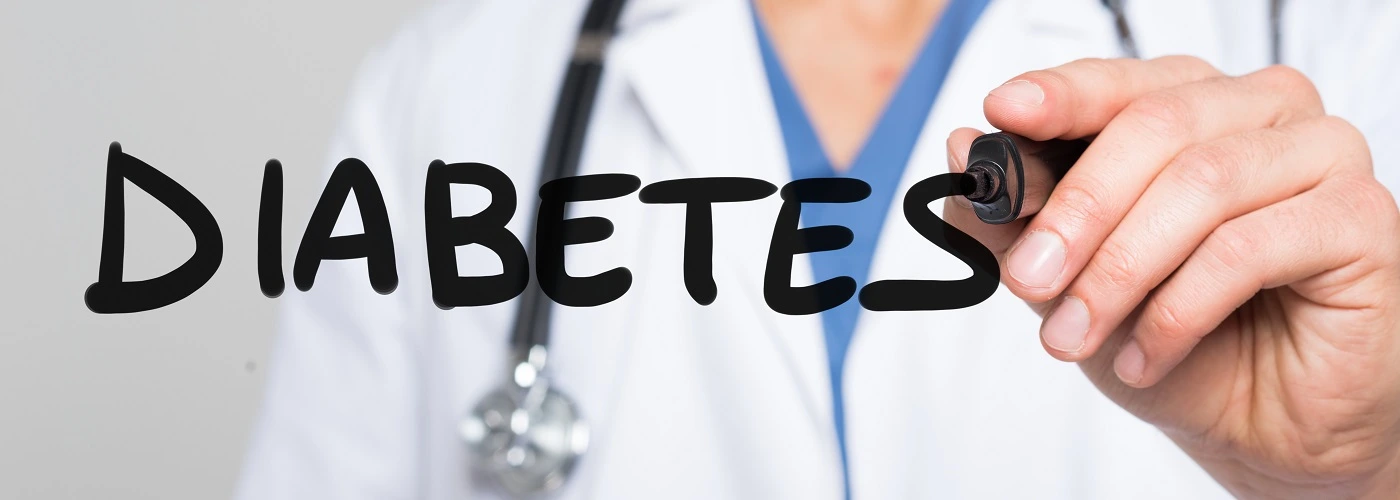

In [213]:
diabets_df = pd.read_csv("DataSet/diabetes.csv",encoding="utf8")
diabets_df = diabets_df.astype(float)
diabets_df.info()
diabets_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0


<Figure size 2000x2000 with 0 Axes>

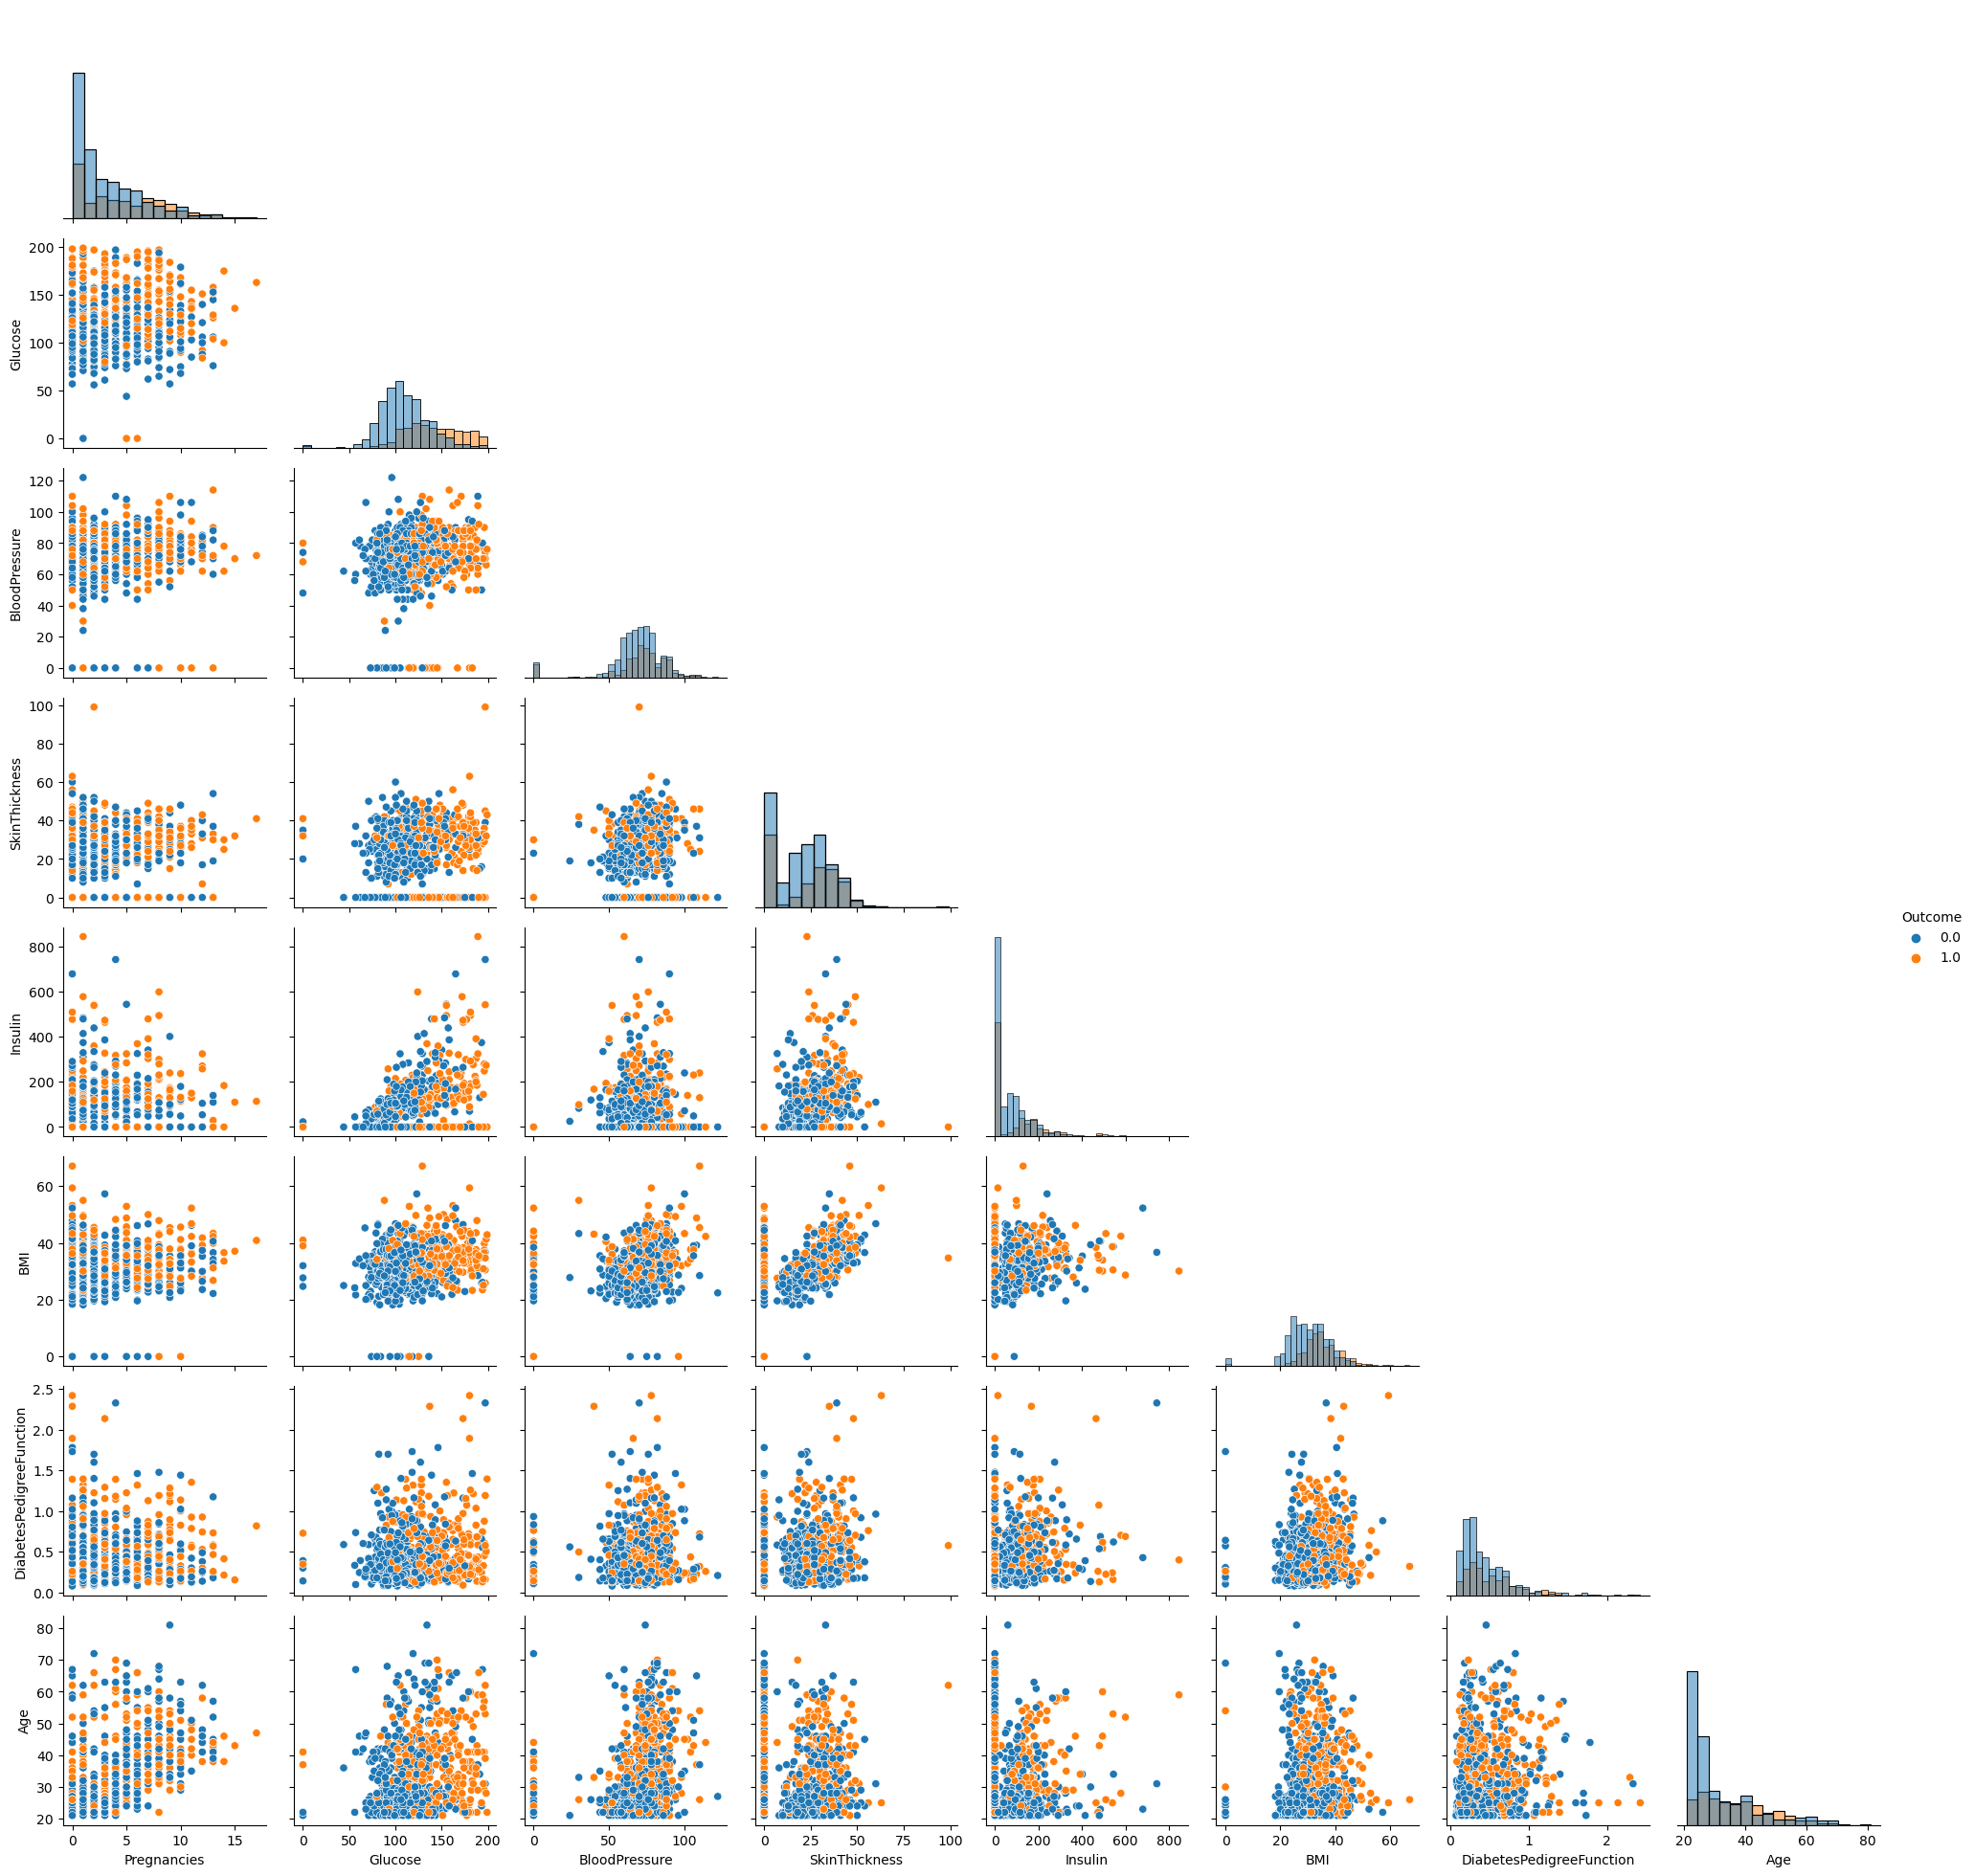

In [214]:
plt.figure(figsize=(20,20))
grid = sns.PairGrid(diabets_df,hue='Outcome',corner=True)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

0.0    499
1.0    268
Name: Outcome, dtype: int64

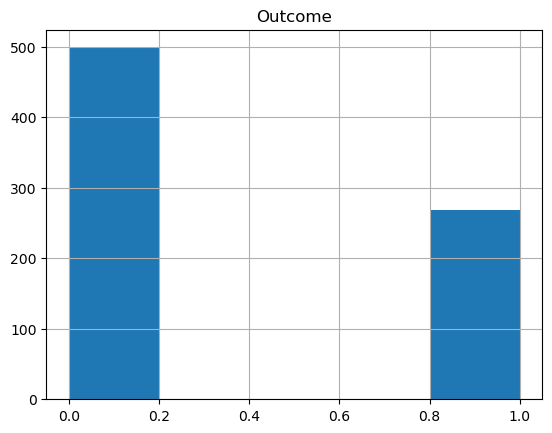

In [215]:
diabets_df.hist(column='Outcome',bins=5)
diabets_df['Outcome'].value_counts()

<AxesSubplot:>

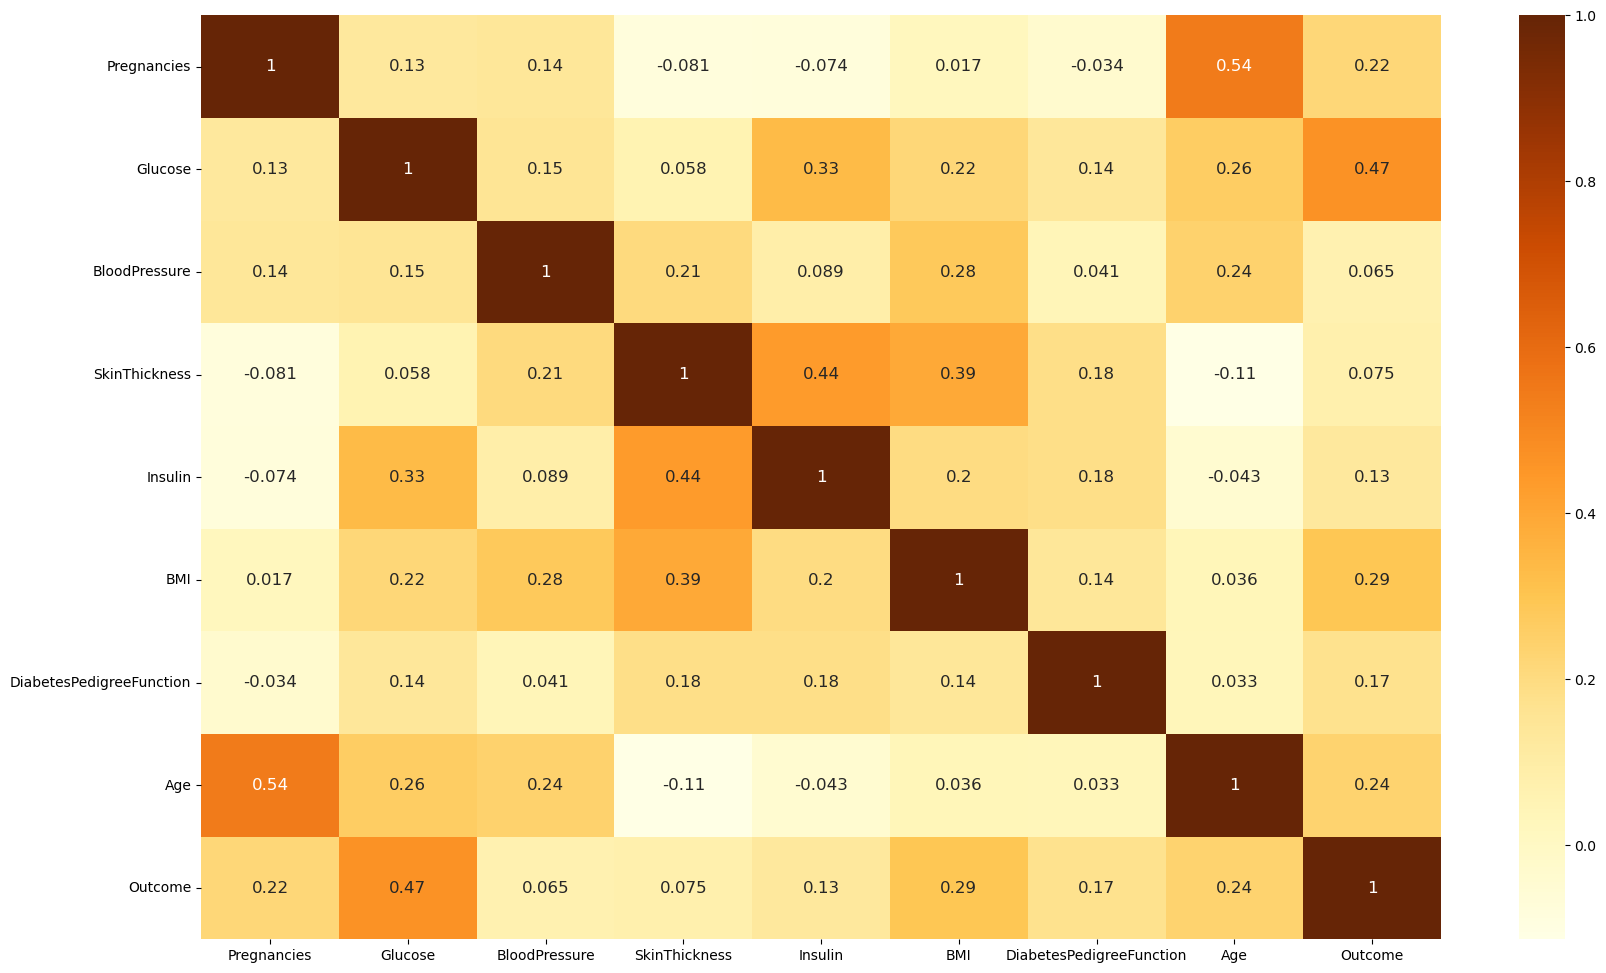

In [216]:
plt.figure(figsize=(20,12))
sns.heatmap(diabets_df.corr(),annot=True,cmap='YlOrBr',annot_kws={'fontsize':12})

In [217]:
diabets_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [218]:
X=diabets_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
display(X[0:5])
y = diabets_df[['Outcome']].values
display(y[0:5])

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [219]:
scale = StandardScaler().fit(X)
X = scale.transform(X.astype(float))
X[0:5]

array([[ 0.63872696,  0.8470548 ,  0.14960376,  0.90778923, -0.69355921,
         0.20362197,  0.467638  ,  1.42463671],
       [-0.84582934, -1.124361  , -0.16038116,  0.5315603 , -0.69355921,
        -0.6842578 , -0.36549383, -0.19177802],
       [ 1.23254948,  1.9422858 , -0.26370947, -1.28687953, -0.69355921,
        -1.10282969,  0.60347471, -0.10670356],
       [-0.84582934, -0.99919175, -0.16038116,  0.15533137,  0.12235685,
        -0.49399785, -0.92091504, -1.04252262],
       [-1.14274059,  0.50283934, -1.50364915,  0.90778923,  0.76467376,
         1.40860166,  5.4815219 , -0.0216291 ]])

In [220]:
X_train, X_test ,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (613, 8) (613, 1)
Test set: (154, 8) (154, 1)


In [221]:
k=5
model = KNeighborsClassifier(n_neighbors=k).fit(X=X_train, y=y_train)

In [222]:
y_pred = model.predict(X=X_test)

In [223]:
print(f"Train set Accuracy: { metrics.accuracy_score(y_train,model.predict(X_train)):0.3f}")
print(f"Test set Accuracy: {metrics.accuracy_score(y_test,y_pred):0.3f}")

Train set Accuracy: 0.829
Test set Accuracy: 0.721


In [224]:
Kn=15
mean_acc = np.zeros((Kn-1))
std_acc = np.zeros((Kn-1))

for k in range (1,Kn):
    model = KNeighborsClassifier(n_neighbors=k).fit(X=X_train, y=y_train)
    y_pre = model.predict(X=X_test)
    
    mean_acc[k-1] = metrics.accuracy_score(y_test,y_pre)
    std_acc[k-1] = np.std(y_pre == y_test)/np.sqrt(y_pre.shape[0])
    

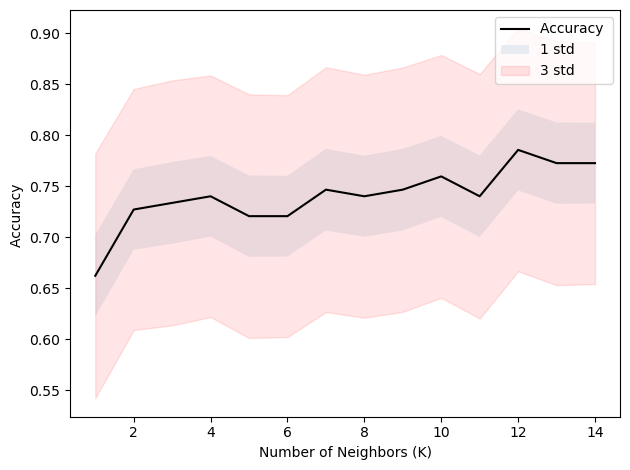

In [225]:
plt.plot(range(1,Kn),mean_acc,'k')
plt.fill_between(range(1,Kn),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Kn),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color="r")
plt.legend(('Accuracy ', '1 std','3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [226]:
print(f"The best accuracy was with : {mean_acc.max():0.3f} with k= {mean_acc.argmax()+1}")

The best accuracy was with : 0.786 with k= 12


In [227]:
model = KNeighborsClassifier(n_neighbors=12).fit(X=X_train, y=y_train)

In [228]:
print(f"Model Score: {model.score(X=X_test, y=y_test):0.3f}")

Model Score: 0.786


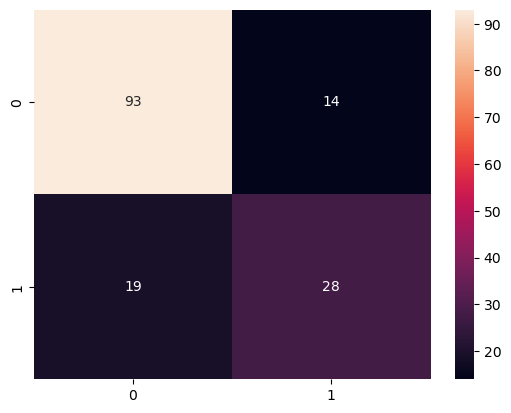

In [229]:
y_pred = model.predict(X=X_test)
conf = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(pd.DataFrame(conf),annot=True ,fmt='g')



In [230]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  28
False Positive(FP) =  14
True Negative(TN)  =  93
False Negative(FN) =  19


---
$$
\text{Accuracy} =  \frac{TP+TN}{P+N}\ = \frac {TP + TN}{TP + FP + TN + FN}\ \\
$$
$$
\text{PPV(Positve Predictive Value , Percision)} =  \frac {TP}{TP+FP}\  
$$
$$ 
\text{TPR(True Positive Rate , recall , hit rate)} = \frac {TP}{P}\ = \frac{TP}{TP+FN}\
$$
$$
F_{1}=2.\frac {PPV.TPR}{PPV+TPR}\ = \frac {2TP}{2TP+FP+FN}\
$$
---

In [231]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
precision = precision_score(y_test,y_pred)
print('percision of the binary classifier = {:0.3f}'.format(precision))
recall = recall_score(y_test, y_pred)
print('recall of the binary classifier = {:0.3f}'.format(recall))
f1 = f1_score(y_test, y_pred)
print('f1 of the binary classifier = {:0.3f}'.format(f1))

Accuracy of the binary classifier = 0.786
percision of the binary classifier = 0.667
recall of the binary classifier = 0.596
f1 of the binary classifier = 0.629
